In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from os import path as op
import nibabel as nb
import numpy as np
from scipy.stats import zscore
from mriqc.interfaces.functional import auto_mask, find_spikes
from mriqc.interfaces.functional import Spikes
import matplotlib.pyplot as plt

In [2]:
!ls data/

sub-51205_task-rest_bold_mcf_mask.nii.gz
sub-51205_task-rest_bold_mcf.nii.gz
sub-51210_task-rest_bold_mcf_mask.nii.gz
sub-51210_task-rest_bold_mcf.nii.gz
sub-51237_task-rest_bold_mcf_mask.nii.gz
sub-51237_task-rest_bold_mcf.nii.gz
sub-51258_task-rest_bold_mcf_mask.nii.gz
sub-51258_task-rest_bold_mcf.nii.gz
sub-51273_task-rest_bold_mcf_mask.nii.gz
sub-51273_task-rest_bold_mcf.nii.gz
sub-51277_task-rest_bold_mcf_mask.nii.gz
sub-51277_task-rest_bold_mcf.nii.gz
sub-ben01_task-unknown_bold_mask.nii.gz
sub-ben01_task-unknown_bold.nii.gz


In [50]:
sub_id = '51205'
func_name = op.abspath('./data/sub-ben01_task-unknown_bold.nii.gz')
mask_name = op.abspath('./data/sub-ben01_task-unknown_bold_mask.nii.gz')
#func_name = op.abspath('./data/sub-{}_task-rest_bold_mcf.nii.gz'.format(sub_id))
mask_name = op.abspath('./data/sub-{}_task-rest_bold_mcf_mask.nii.gz'.format(sub_id))
func_name = './ABIDE-BIDS/sub-{0}/func/sub-{0}_task-rest_bold.nii.gz'.format(sub_id)

func_nii = nb.load(func_name)
mask_nii = nb.load(mask_name)
func_data = func_nii.get_data()
mask_data = mask_nii.get_data()
func_shape = func_data.shape
ntsteps = func_shape[-1]
tr = func_nii.get_header().get_zooms()[-1]

fake_seg = np.random.choice([1, 2, 3], size=mask_data.shape) * mask_data

In [51]:
sp_if = Spikes(in_file=func_name, in_mask=mask_name)
res = sp_if.run()

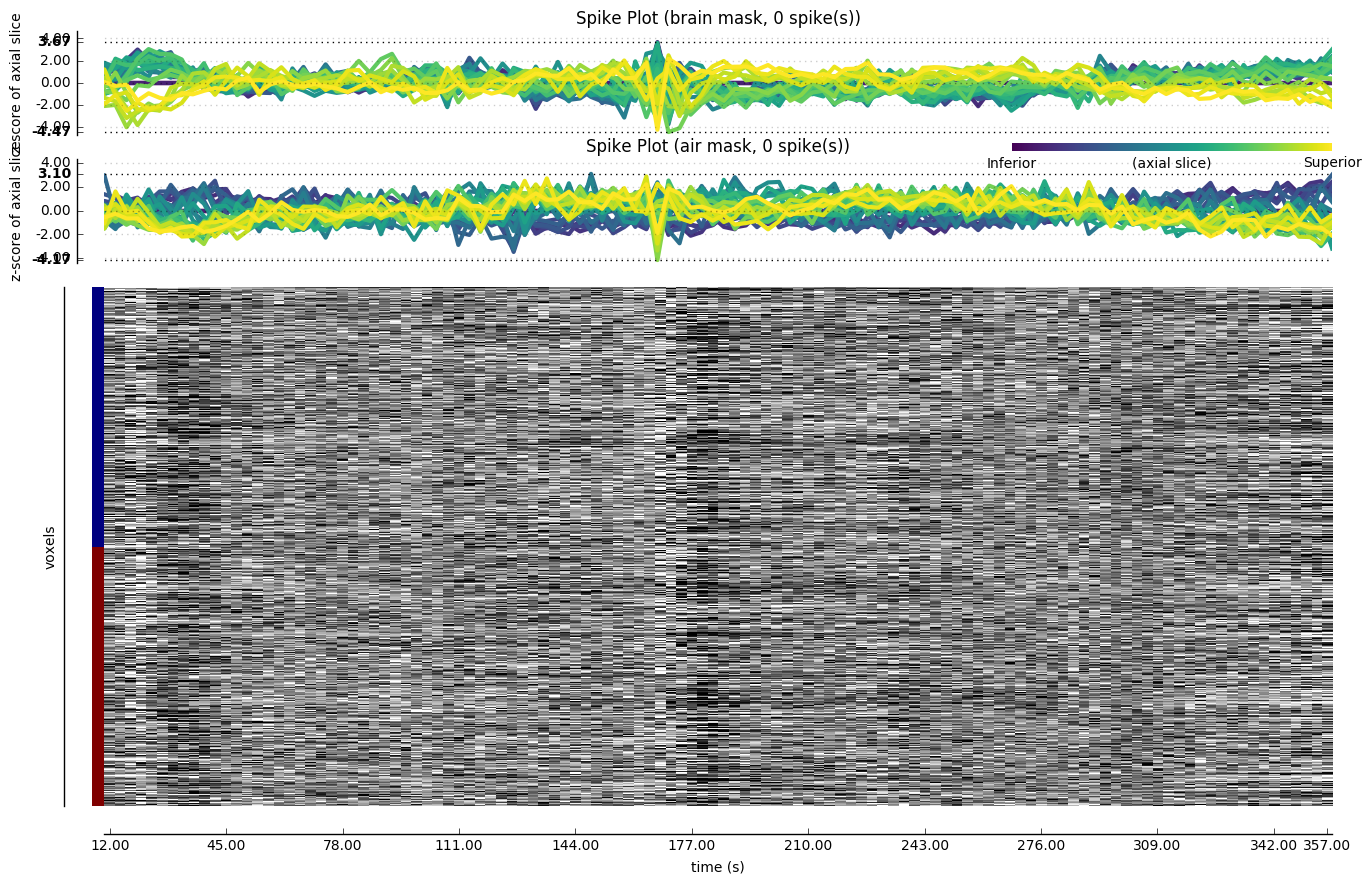

In [62]:
from mriqc.viz.fmriplots import spikesplot, spikesplot_cb, fmricarpetplot
fig = plt.figure(figsize=(16,10))
outer_grid = mgs.GridSpec(3, 1, wspace=0.0, hspace=0.1, height_ratios=[1, 1, 5])

nspikes = res.outputs.num_spikes
spikesplot(res.outputs.out_brain_tsz, title='Spike Plot (brain mask, %d spike(s))' % nspikes, tr=tr,
           outer_gs=outer_grid[0])
spikesplot(res.outputs.out_bg_tsz, title='Spike Plot (air mask, %d spike(s))' % nspikes, tr=tr,
           outer_gs=outer_grid[1])
fmricarpetplot(func_data, fake_seg, outer_grid[2], tr=tr)

spikesplot_cb([0.7, 0.78, 0.2, 0.008])